In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

/home/anthony/workspace/yt-data


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 821 total files
Found 819 jpgs


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


  0%|          | 0/819 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

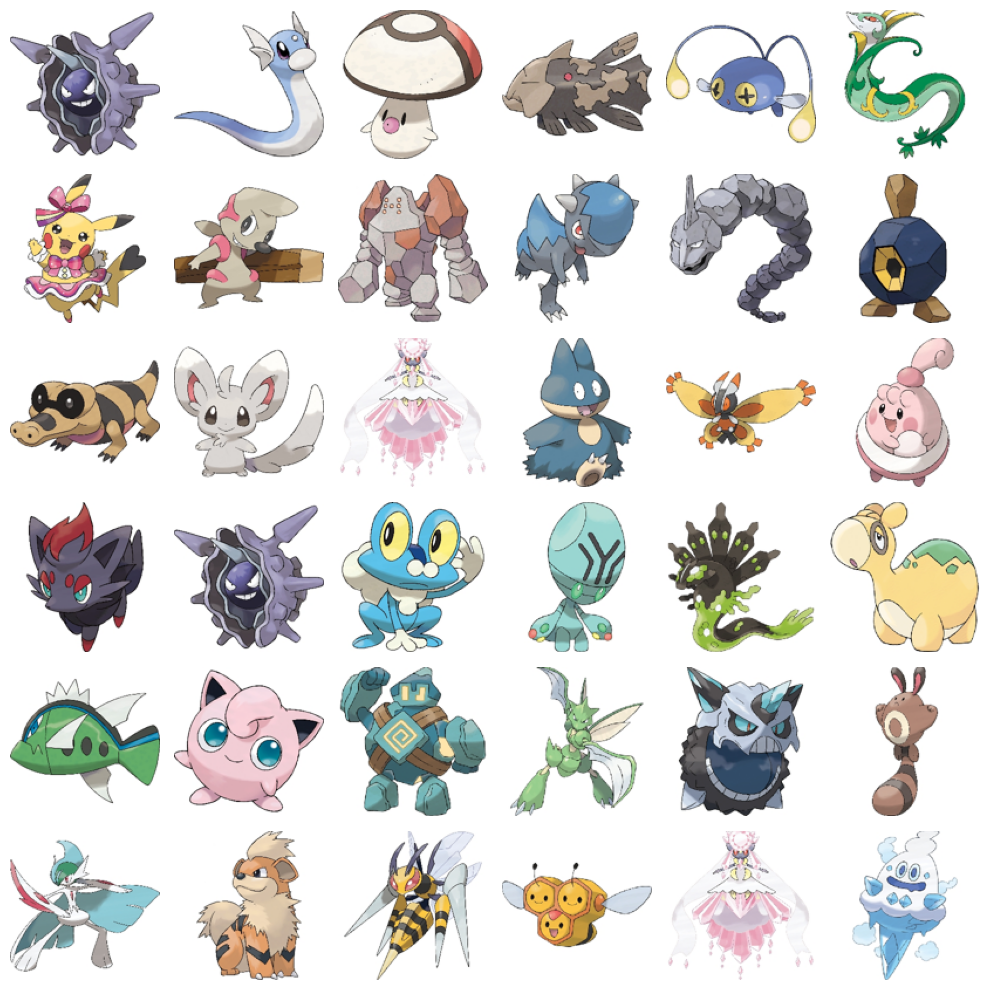

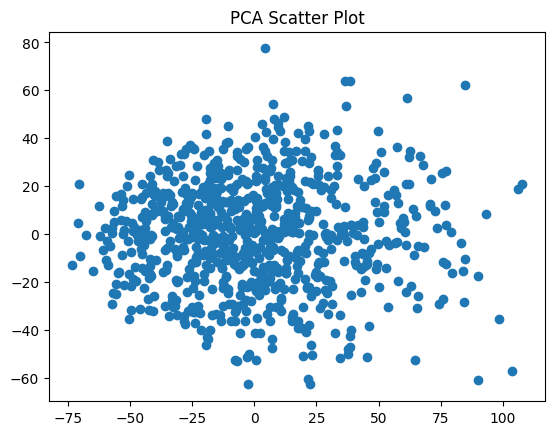

2023-07-29 13:40:09.892159: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 img_input (InputLayer)                                           [(None, 128, 128, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 diff_augment_layer (DiffAugmentLayer)                            (None, 128, 128, 3)                         0                       ['img_input[0][0]']                    

AttributeError: 'HyperParams' object has no attribute 'weight_path'

In [2]:
# from thumbs.experiments.pokemon import PokemonExperiment
from thumbs.experiments.pokemon_wgan_resnet import PokemonExperiment
from thumbs.train import load_weights


exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
load_weights(m.generator, exp.get_params().weight_path + "_gen")
load_weights(m.discriminator, exp.get_params().weight_path + "_dis")

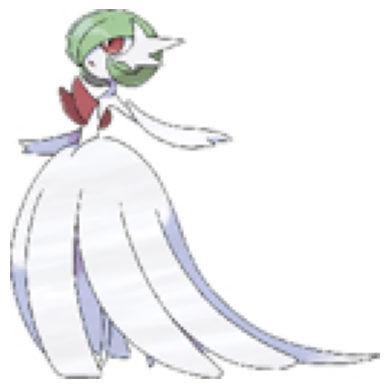

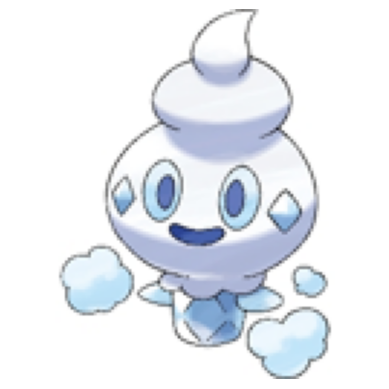

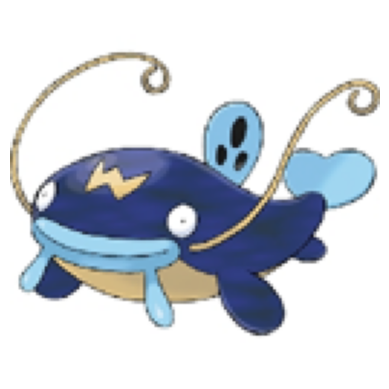

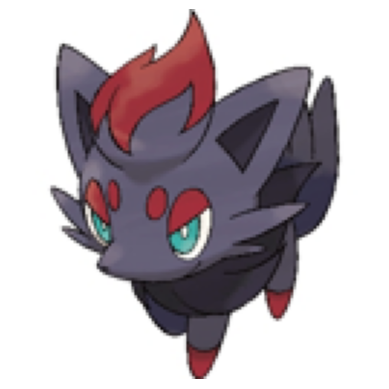

In [7]:
from thumbs.viz import visualize_preprocessed_image

data = exp.data
for img in data:
    visualize_preprocessed_image(img)

819
 =================== epoch 0


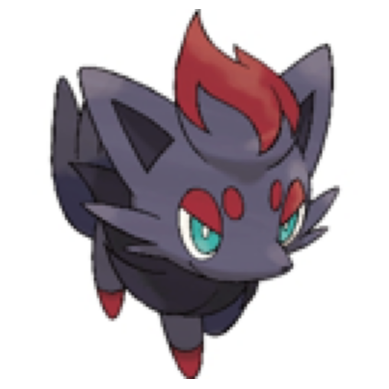

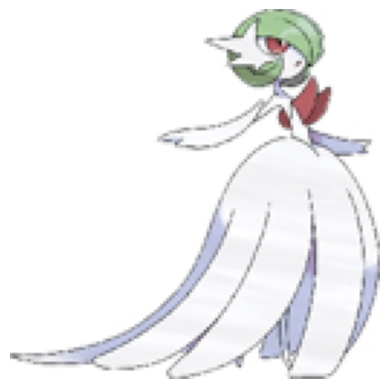

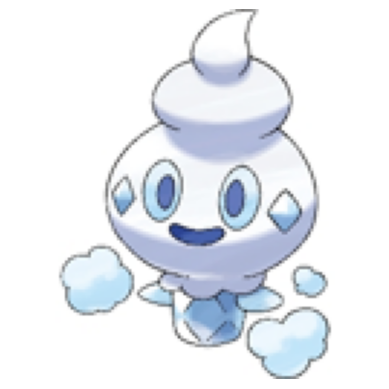

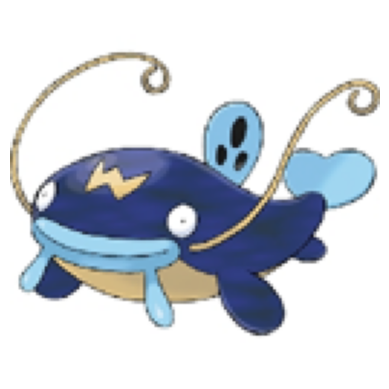

 =================== epoch 1


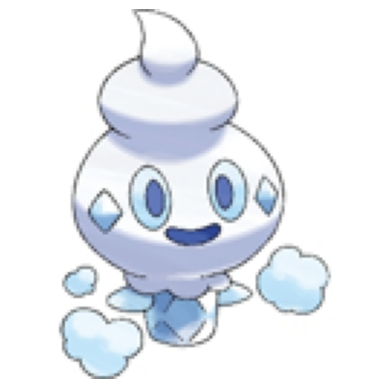

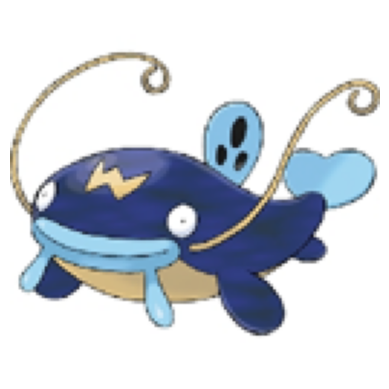

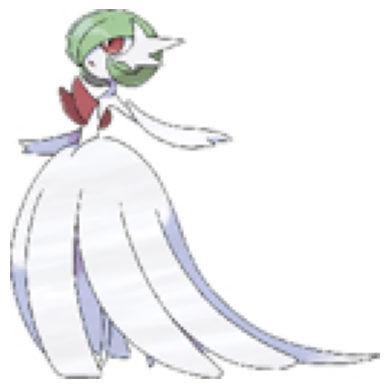

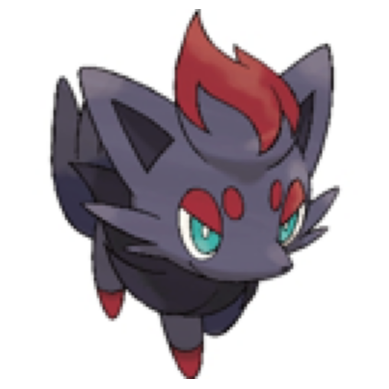

 =================== epoch 2


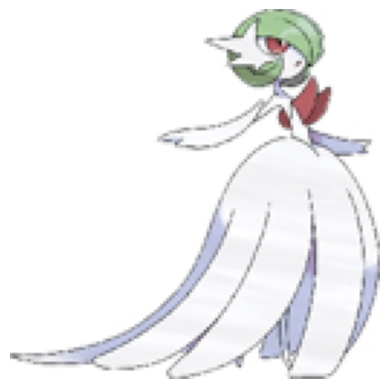

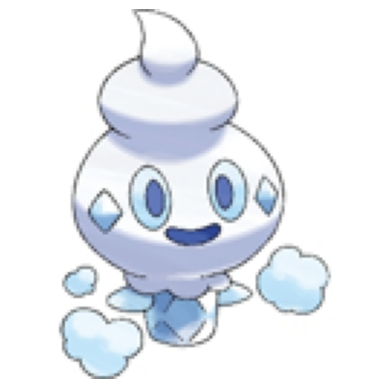

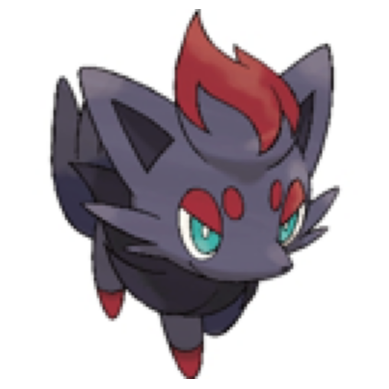

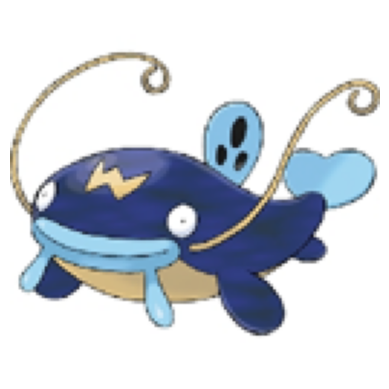

In [35]:
import tensorflow as tf
import numpy as np
from thumbs.viz import visualize_preprocessed_image

dataset = tf.data.Dataset.from_tensor_slices(data[:4])
mparams[0].batch_size = 1
d = exp.prepare_data(dataset, mparams[0])


print(len(data))
for i in range(3):
    print(f' =================== epoch {i}')
    for batch in d:
        for img in batch:
            visualize_preprocessed_image(img.numpy())

Loaded previous weights
Loaded previous weights


<Figure size 640x480 with 0 Axes>

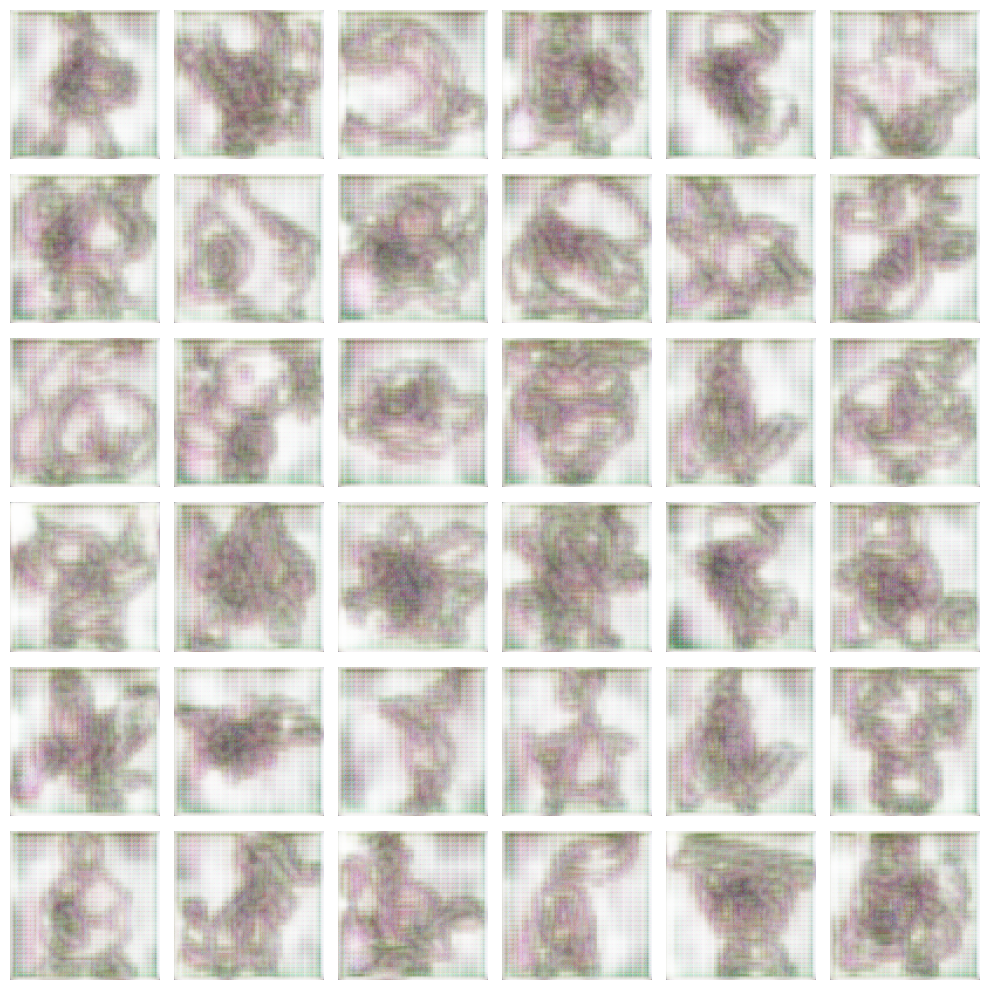

In [11]:
import numpy as np
from thumbs.viz import visualize_preprocessed_image, show_samples


def get_labels(n = 36):
    random_indexes = np.random.randint(0, len(exp.labels), n)

    # get a random pokemon/type label and then generate the outline
    # The outline should align with the pokemon type since the model is trained that way
    pokemon = exp.images[random_indexes]
    types = exp.labels[random_indexes]
    outlines = np.array([exp.create_outline(x) for x in pokemon])
    return types, outlines

show_samples(m.generator, 100, None, None, label_getter=get_labels)

<Figure size 640x480 with 0 Axes>

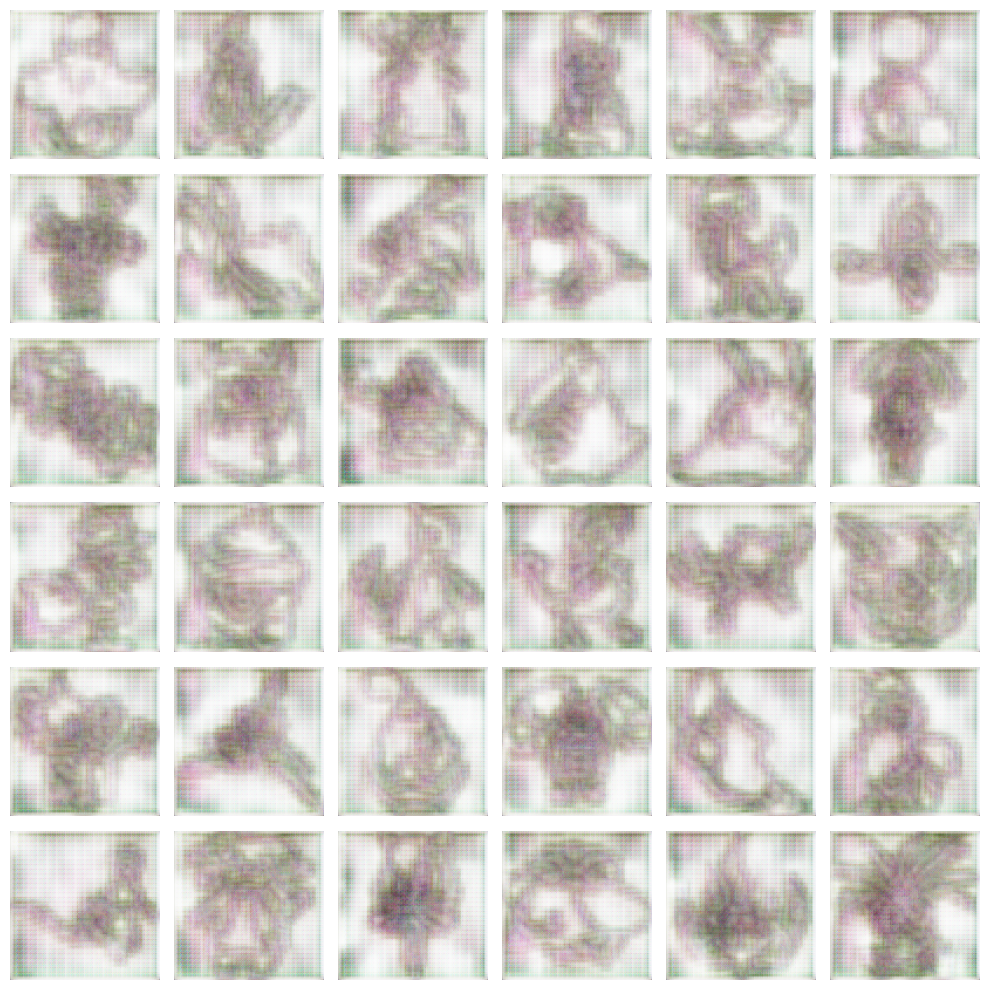

In [12]:
from thumbs.viz import visualize_preprocessed_image, show_samples

# for types, outline in exp.get_random_labels(36):
#     print(exp.lookup_inverted(types))
#     visualize_preprocessed_image(outline)

show_samples(m.generator, 100, None, None, label_getter=exp.get_random_labels)

In [4]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(data)

In [5]:
prepared = exp.prepare_data(dataset, exp.get_mutable_params()[0])

tf.Tensor(
[[ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          0.9843137 ]
 [ 1.          1.          1.        ]
 [ 1.          0.99215686  1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.         

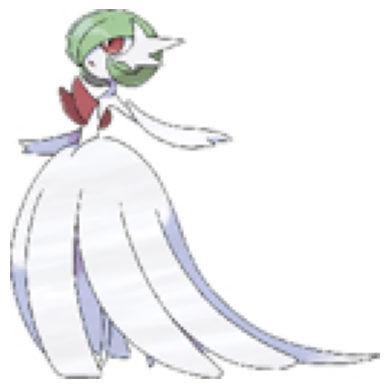

In [10]:

from thumbs.viz import show_samples, visualize_preprocessed_image

item, = prepared.__iter__().__next__()

print(item[0])
visualize_preprocessed_image(item.numpy())

In [41]:
exp.lookup(['bug'])

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>